# <center><font color="pink">**Install dan Call Library**</font></center>

In [ ]:
# Menginstall library yang dibutuhkan
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 31.6 MB/s eta 0:00:00


In [ ]:
# Memanggi library yang diperlukan
import pandas as pd
import numpy as np

import re
import string

import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

import spacy

import gensim
from gensim import corpora

# Library for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# <center><font color="pink">**Import CSV**</font></center>

In [ ]:
# Menyimpan path dari file data ke dalam variabel dataset
dataset = "/content/dataset.csv"
# Membaca File CSV ke DataFrame
df = pd.read_csv(dataset, sep=',', encoding='latin-1', on_bad_lines='skip')
# Melihat sedikit bagian atas data
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,conversation_id_str,created_at,full_text,username;;;;;;;;;;;;
0,1710806470810630000,Sat Oct 07 23:59:52 +0000 2023,@rgone360 Kena beli sorg lg wing back january ...,luqmanha14;;;;;;;;;;;;
1,1710652778232920000,Sat Oct 07 23:59:52 +0000 2023,@yogi_bintoro @yo2thok Kemungkinan dapet pas d...,AsySyaiful01;;;;;;;;;;;;
2,1710628935221080000,Sat Oct 07 23:59:50 +0000 2023,@kompascom Bangsaatt .... Hamas itu bukan tero...,haenesarajawane;;;;;;;;;;;;
3,1710807167656470000,Sat Oct 07 23:59:48 +0000 2023,Mana yg sokong Ukraine tempoh hari? Nahhh seka...,iammco;;;;;;;;;;;;
4,1710647444512570000,Sat Oct 07 23:59:46 +0000 2023,@tempodotco AS dukung israel ..Rusia dukung Pa...,CaprionDeni;;;;;;;;;;;;


# <center><font color="pink">**Data Pre-processing**</font></center>

In [ ]:
# Mengambil variabel penting untuk dianalisis
df_baru = df[['username;;;;;;;;;;;;','full_text']]
# Melihat sedikit bagian atas data
df_baru.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,username;;;;;;;;;;;;,full_text
0,luqmanha14;;;;;;;;;;;;,@rgone360 Kena beli sorg lg wing back january ...
1,AsySyaiful01;;;;;;;;;;;;,@yogi_bintoro @yo2thok Kemungkinan dapet pas d...
2,haenesarajawane;;;;;;;;;;;;,@kompascom Bangsaatt .... Hamas itu bukan tero...
3,iammco;;;;;;;;;;;;,Mana yg sokong Ukraine tempoh hari? Nahhh seka...
4,CaprionDeni;;;;;;;;;;;;,@tempodotco AS dukung israel ..Rusia dukung Pa...


In [ ]:
# Menghilangkan tanda titik koma pada kolom username
df_baru['username;;;;;;;;;;;;'] = df_baru['username;;;;;;;;;;;;'].str.replace(';', '')
# Mengganti nama kolom secara langsung
df_baru.columns = ['username', 'full_text']
# Melihat sedikit bagian atas data
df_baru.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-5-4976611e290f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baru['username;;;;;;;;;;;;'] = df_baru['username;;;;;;;;;;;;'].str.replace(';', '')


,username,full_text
0,luqmanha14,@rgone360 Kena beli sorg lg wing back january ...
1,AsySyaiful01,@yogi_bintoro @yo2thok Kemungkinan dapet pas d...
2,haenesarajawane,@kompascom Bangsaatt .... Hamas itu bukan tero...
3,iammco,Mana yg sokong Ukraine tempoh hari? Nahhh seka...
4,CaprionDeni,@tempodotco AS dukung israel ..Rusia dukung Pa...


In [ ]:
# Melihat informasi data sebelum missing value dan duplikat dihapus
print('jumlah baris data sebelum dibershikan:', df_baru.shape)

# Membersihkan baris-baris yang mengandung missing value (Nan atau Null)
df_baru = df_baru.dropna()
# Menghapus data duplikat
df_baru = df_baru.drop_duplicates()

# Melihat informasi data setelah missing value dan duplikat dihapus
print('jumlah baris data setelah dibershikan:', df_baru.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


jumlah baris data sebelum dibershikan: (108966, 2)
jumlah baris data setelah dibershikan: (96946, 2)


# <center><font color="pink">**Komunitas dominan 1 (Cluster-0)**</font></center>
Melihat topik-topik terdeteksi dari kata-kata yang paling sering muncul.

## <center><font color="pink">Ambil semua tweet dari komunitas dominan 1 (Cluster-0)</font></center>

In [ ]:
# Mengimport dan membaca File CSV ke DataFrame
df_leiden = pd.read_csv('/content/leiden_result.csv', delimiter=',')

# Melihat sedikit bagian atas data
df_leiden.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,indegree,outdegree,Degree,Cluster
0,Tita83079013,54,2,56,3
1,Ndons_Back,26,0,26,1
2,SoftWarNews,18,0,18,0
3,Israel,14,0,14,0
4,CNNIndonesia,12,0,12,0


In [ ]:
# Membentuk data frame yang berisi Id, indegree dan outdegree dari cluster 0
cluster_0 = df_leiden[df_leiden['Cluster'] == 0][['Id', 'indegree', 'outdegree']]

# Menampilkan jumlah user dan nama-namanya yang ada pada cluster 0

# Menyimpan jumlah user cluster 0 ke dalam variabel jumlah_id_cluster_0
jumlah_id_cluster_0 = len(cluster_0['Id'].unique())
# Melihat jumlah user cluster 0
print(f"Jumlah user pada Cluster 0 ada sebanyak {jumlah_id_cluster_0} user.")

# Menyimpan nama-nama user cluster 0 ke dalam variabel cluster_0_id
cluster_0_id = cluster_0['Id'].to_numpy()
# Mencetak tulisan untuk judul
print('\nBerikut adalah nama user-usernya:')
# Melihat nama-nama user cluster 0
print(cluster_0_id)

Jumlah user pada Cluster 0 ada sebanyak 62 user.

Berikut adalah nama user-usernya:
['SoftWarNews' 'Israel' 'CNNIndonesia' 'Narasi_winda' 'Greschinov'
 'awank2017' 'detikcom' 'Chikzt' 'muchlis_ar' 'DanielPither' 'Sentjoko'
 'FeriSuryaSugia1' 'JohnBanting03' 'Avolanza' 'jokowi' 'penjelajahhh'
 'Muhammad_Saewad' 'NusantaraSaja' 'duniabulat5' 'gangsterrandom'
 'OmJ_JeNggot' 'BramantyaNigel' 'Menlu_RI' 'ListyoSigitP' 'kakilangitimur'
 'trikartikatika1' 'DzakwanFirst' 'ilhampurnama887' 'brojong20'
 'kadrunmampos' 'd3vilicious' 'lamegogosa' 'enigma8592' 'The_Savior__'
 'rendyandrew' 'DivHumas_Polri' 'bnsphrxyzzz' 'DivHumas_IPS'
 '98garislurus' 'bunianggg' 'yulius595970893' 'tdkistimewa'
 'ZamZam62338134' 'Dj_Asphury' 'wardoneforget' 'KEANU2749717'
 'alifnuranhar1' 'wahyu16084726' 'rijalsunandr' 'Kerajaan_Israel'
 'hadesiamah' 'Hamba60455437' 'talangijoo' 'WarIsraelHamas' 'erlanishere'
 'ran21827785' 'kabentar_gelap' 'Apry3j4' 'GHarold7072' 'ProfOnline_id'
 'jonnypengacara' 'triwidi98540720']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Mengambil data dari variabel full_text pada df_baru yang ada username dari variabel cluster_0_id
df_cluster_0 = df_baru[df_baru['username'].isin(cluster_0_id)]

# Mengambil bagian full_text nya saja
df_tweet_cluster_0 = df_cluster_0['full_text']

df_tweet_cluster_0.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_text
25,#AlAqsaStorm Teroris Apartheid Zionis Israel t...
57,Selebrasi pr pencari suaka Palestina di-kamp p...
81,BREAKING: Penjahat perang Israel Benjamin Neta...
155,Mereka berteriak Palestina Teroris Hamas Teror...
459,Pilu Warga Gaza Diserang Israel: Jadi Tunawism...


## <center><font color="pink">Text Preprocessing</font></center>
Tahap pertama di Text Mining

In [ ]:
# Case Folding
df_tweet_cluster_0 = df_tweet_cluster_0.str.lower()
# Melihat sedikit bagian atas data
df_tweet_cluster_0.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_text
25,#alaqsastorm teroris apartheid zionis israel t...
57,selebrasi pr pencari suaka palestina di-kamp p...
81,breaking: penjahat perang israel benjamin neta...
155,mereka berteriak palestina teroris hamas teror...
459,pilu warga gaza diserang israel: jadi tunawism...


In [ ]:
# Membuat fungsi untuk membersihkan tweet
def clean_tweet(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub(r"([@#]\S+)|(\w+:\/\/\S+)", " ", text).split())
    # remove incomplete URL
    text = text.replace("http://", " ").replace("https://", " ")
    # remove number
    text = re.sub(r"\d+", "", text)
    # remove punctuation
    text = text.translate(str.maketrans("","",string.punctuation))
    # remove whitespace leading & trailing
    text = text.strip()
    # remove multiple whitespace into single whitespace
    text = re.sub('\s+',' ',text)
    # remove single char
    text = re.sub(r"\b[a-zA-Z]\b", "", text)
    return text

# Menjalankan fungsi clean_tweet pada data df_cleaned
df_cleaned = df_tweet_cluster_0.apply(clean_tweet)
# Melihat sedikit bagian atas data
df_cleaned.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:18: DeprecationWarning: invalid escape sequence '\s'
<>:18: DeprecationWarning: invalid escape sequence '\s'
<ipython-input-34-3af9940700e5>:18: DeprecationWarning: invalid escape sequence '\s'
  text = re.sub('\s+',' ',text)


,full_text
25,teroris apartheid zionis israel telah membunuh...
57,selebrasi pr pencari suaka palestina dikamp pe...
81,breaking penjahat perang israel benjamin netan...
155,mereka berteriak palestina teroris hamas teror...
459,pilu warga gaza diserang israel jadi tunawisma...


In [ ]:
# Tokenizing
nltk.download('punkt')

# Membuat fungsi yang menerima teks sebagai input dan mengembalikan hasil tokenisasi teks dengan NLTK word tokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

# Menjalankan fungsi word_tokenize_wrapper pada data df_cleaned
df_tokens = df_cleaned.apply(word_tokenize_wrapper)
# Melihat sedikit bagian atas data
df_tokens.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,full_text
25,"[teroris, apartheid, zionis, israel, telah, me..."
57,"[selebrasi, pr, pencari, suaka, palestina, dik..."
81,"[breaking, penjahat, perang, israel, benjamin,..."
155,"[mereka, berteriak, palestina, teroris, hamas,..."
459,"[pilu, warga, gaza, diserang, israel, jadi, tu..."


## <center><font color="pink">Feature Selection</font></center>
Tahap kedua di Text Mining

In [ ]:
# Mengunduh daftar stopwords dari NLTK
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Memanggil library yang diperlukan
from nltk.corpus  import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')

# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

# Menjalankan fungsi stopwords_removal pada data df_tokens
df_tokens_sw = df_tokens.apply(stopwords_removal)
# Melihat sedikit bagian atas data
df_tokens_sw.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_text
25,"[teroris, apartheid, zionis, israel, membunuh,..."
57,"[selebrasi, pr, pencari, suaka, palestina, dik..."
81,"[breaking, penjahat, perang, israel, benjamin,..."
155,"[berteriak, palestina, teroris, hamas, teroris..."
459,"[pilu, warga, gaza, diserang, israel, tunawism..."


In [ ]:
# Membuka file slangword
slang = open("/content/slangword.txt", encoding="utf-8", errors="replace")
# Membacanya dan membuat list
slang = slang.readlines()
# Menghapus karakter newline dan spasi berlebih dari setiap baris dalam list
slang = [t.strip('\n').strip() for t in slang]
# Memisahkan kata slang dan kata asalnya
slang = [t.split(":") for t in slang]
# Membuat dictionary dari list
slang = {kv[0].strip(): kv[1].strip() for kv in slang}
# Membuat ulang dictionary untuk memastikan tipe data dictionary
slang = dict(slang)

# Membuat fungsi yang akan menggantikan istilah slang dalam dokumen.
def replace_slang(document):
    return [slang[term] if term in slang else term for term in document]

# Menjalankan fungsi replace_slang pada data df_tokens
df_tokens_norm = df_tokens_sw.apply(replace_slang)
# Melihat sedikit bagian atas data
df_tokens_norm.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_text
25,"[teroris, apartheid, zionis, israel, membunuh,..."
57,"[selebrasi, pr, pencari, suaka, palestina, dik..."
81,"[breaking, penjahat, perang, israel, benjamin,..."
155,"[berteriak, palestina, teroris, hamas, teroris..."
459,"[pilu, warga, gaza, diserang, israel, tunawism..."


In [ ]:
# Menginstall dan memanggil library yang diperlukan
!pip install Sastrawi
!pip install swifter
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Membuat instance dari StemmerFactory, yang akan digunakan untuk menghasilkan stemmer
factory = StemmerFactory()
# Membuat stemmer menggunakan metode yang ditentukan oleh StemmerFactory
stemmer = factory.create_stemmer()

# Membuat fungsi untuk melakukan stemming pada kata-kata dalam dokumen
def stemmed_wrapper(term):
    return stemmer.stem(term)

# Membuat dictionary untuk menyimpan kata-kata yang telah di stemming
term_dict = {}
for document in df_tokens_norm:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

# Mencetak jumlah istilah yang unik yang telah disimpan dalam term_dict
print(len(term_dict))

8424


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Memulai loop untuk mengganti nilai dari setiap istilah di term_dict dengan hasil stemming yang diperoleh dari fungsi stemmed_wrapper
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Mendefinisikan fungsi yang akan menerima sebuah dokumen sebagai input
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

# Menjalankan fungsi get_stemmed_term pada data df_tokens
df_tokens_stemmed = df_tokens_norm.apply(get_stemmed_term)
# Melihat sedikit bagian atas data
df_tokens_stemmed.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_text
25,"[teroris, apartheid, zionis, israel, bunuh, pe..."
57,"[selebrasi, pr, cari, suaka, palestina, kamp, ..."
81,"[breaking, jahat, perang, israel, benjamin, ne..."
155,"[teriak, palestina, teroris, hamas, teroris, o..."
459,"[pilu, warga, gaza, serang, israel, tunawisma,..."


## <center><font color="pink">Text Representation</font></center>
Tahap terakhir di Text Mining

In [ ]:
# Create the dictionary
dictionary = corpora.Dictionary(df_tokens_stemmed)

# Mengubah setiap dokumen dalam df_tokens_stemmed menjadi representasi matriks istilah-dokumen
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df_tokens_stemmed]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## <center><font color="pink">LDA Model</font></center>

In [ ]:
# membuat objek untuk Model LDA menggunakan library gensim
LDA = gensim.models.ldamodel.LdaModel

# Membangun model LDA
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50, iterations=100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Mencetak topik-topik yang dihasilkan oleh model Latent Dirichlet Allocation (LDA) beserta kata-kata utama dan probabilitasnya dalam setiap topik
lda_model.print_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.036*"israel" + 0.028*"hamas" + 0.026*"tidak" + 0.025*"palestina" + 0.015*"dukung" + 0.011*"warga" + 0.011*"iblis" + 0.010*"negara" + 0.010*"pesek" + 0.009*"berita"'),
 (1,
  '0.024*"pbb" + 0.024*"mati" + 0.021*"anak" + 0.019*"gaza" + 0.019*"bela" + 0.014*"hamas" + 0.012*"israel" + 0.011*"kamu" + 0.009*"the" + 0.009*"resolusi"'),
 (2,
  '0.022*"hamas" + 0.017*"bahasa" + 0.013*"sayang" + 0.012*"anda" + 0.012*"dunia" + 0.011*"nyawa" + 0.011*"dapat" + 0.010*"pakai" + 0.010*"takut" + 0.009*"ber"'),
 (3,
  '0.070*"palestina" + 0.063*"israel" + 0.036*"arab" + 0.030*"bangsa" + 0.027*"negara" + 0.018*"orang" + 0.016*"tanah" + 0.015*"dukung" + 0.014*"milik" + 0.014*"yahudi"'),
 (4,
  '0.070*"israel" + 0.034*"gaza" + 0.034*"serang" + 0.016*"tentara" + 0.014*"perang" + 0.012*"warga" + 0.011*"lapor" + 0.010*"palestina" + 0.009*"tingkat" + 0.009*"militer"'),
 (5,
  '0.038*"israel" + 0.029*"hizbullah" + 0.019*"utara" + 0.019*"gaza" + 0.019*"zionis" + 0.017*"tentara" + 0.016*"target" + 0.016

In [ ]:
# Memvisualisasikan topik-topiknya
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.091243  0.040959       1        1  15.135548
5     -0.180323 -0.114739       2        1  14.573607
3      0.054342  0.255671       3        1  12.741501
8     -0.133105 -0.112388       4        1  12.660869
4     -0.214623 -0.011994       5        1  12.626011
9     -0.036919  0.150371       6        1   8.860592
0      0.090658  0.066818       7        1   8.389139
1      0.111698 -0.060739       8        1   7.601677
2      0.184346 -0.127691       9        1   3.749919
6      0.215170 -0.086268      10        1   3.661136, topic_info=           Term        Freq       Total Category  logprob  loglift
150        arab  227.000000  227.000000  Default  30.0000  30.0000
304      bangsa  172.000000  172.000000  Default  29.0000  29.0000
10    palestina  924.000000  924.000000  Default  28.0000  28.0000
36       perang  357.000000  357.000000  Default  27.0000  27.0000
15        hamas  541.000000  541.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
275       hidup   15.064275   69.791284  Topic10  -4.7002   1.7742
94       yahudi   16.976213  129.920833  Topic10  -4.5807   1.2723
1048      mukim    9.700201   45.295859  Topic10  -5.1404   1.7663
123        anda    9.309003   68.479534  Topic10  -5.1816   1.3118
1118      musuh    8.546043   64.837248  Topic10  -5.2671   1.2810

[577 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
261       6  0.937687   abbas
801       4  0.981219  adegan
6092      6  0.947547  adidas
1410      6  0.980386    adil
523       3  0.191427   agama
...     ...       ...     ...
13        2  0.368341  zionis
13        4  0.206630  zionis
13        5  0.062887  zionis
13        6  0.134759  zionis
13        7  0.095828  zionis

[824 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 4, 9, 5, 10, 1, 2, 3, 7])

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix, total_docs=10000)) # ukuran seberapa baik modelnya (semakin rendah semakin baik)

# Menghitung Nilai Koherensi
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=df_tokens_stemmed, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.260306746277664

Coherence Score:  0.3984326790208464


## <center><font color="pink">Optimal Number of Topics</font></center>

In [ ]:
# Membuat fungsi untuk menghitung nilai koherensi
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3, passes=50, iterations=100):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=num_topics, passes=passes,
                                       iterations=iterations, random_state=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# menghitung nilai koherensi untuk berbagai model LDA dengan jumlah topik yang berbeda
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=df_tokens_stemmed, start=2, limit=50, step=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


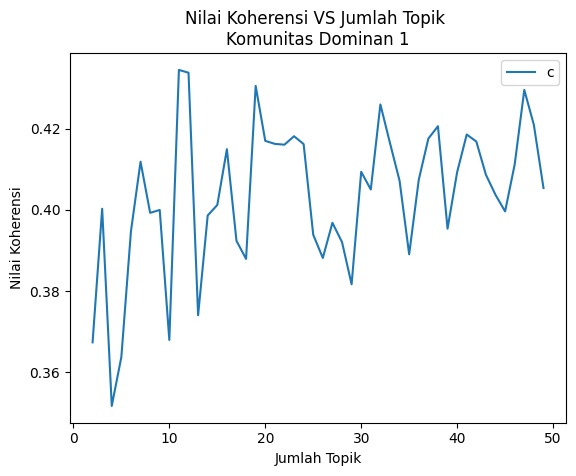

In [ ]:
# Menunjukkan Grafik
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.title("Nilai Koherensi VS Jumlah Topik \nKomunitas Dominan 1")
plt.xlabel("Jumlah Topik")
plt.ylabel("Nilai Koherensi")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Mencetak Nilai Koherensi
for m, cv in zip(x, coherence_values):
    print("Jumlah Topik =", m, " memiliki nilai Koherensi", round(cv, 4))

Jumlah Topik = 2  memiliki nilai Koherensi 0.3673
Jumlah Topik = 3  memiliki nilai Koherensi 0.4003
Jumlah Topik = 4  memiliki nilai Koherensi 0.3517
Jumlah Topik = 5  memiliki nilai Koherensi 0.3637
Jumlah Topik = 6  memiliki nilai Koherensi 0.3947
Jumlah Topik = 7  memiliki nilai Koherensi 0.4119
Jumlah Topik = 8  memiliki nilai Koherensi 0.3993
Jumlah Topik = 9  memiliki nilai Koherensi 0.4
Jumlah Topik = 10  memiliki nilai Koherensi 0.3679
Jumlah Topik = 11  memiliki nilai Koherensi 0.4345
Jumlah Topik = 12  memiliki nilai Koherensi 0.4339
Jumlah Topik = 13  memiliki nilai Koherensi 0.374
Jumlah Topik = 14  memiliki nilai Koherensi 0.3986
Jumlah Topik = 15  memiliki nilai Koherensi 0.4012
Jumlah Topik = 16  memiliki nilai Koherensi 0.415
Jumlah Topik = 17  memiliki nilai Koherensi 0.3924
Jumlah Topik = 18  memiliki nilai Koherensi 0.3879
Jumlah Topik = 19  memiliki nilai Koherensi 0.4306
Jumlah Topik = 20  memiliki nilai Koherensi 0.417
Jumlah Topik = 21  memiliki nilai Koherensi 0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Menghitung model dengan nilai koherensi tertinggi
max_coherence_index = coherence_values.index(max(coherence_values))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Memilih model dengan koherensi terbaik
optimal_model = model_list[max_coherence_index]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.027*"hamas" + 0.023*"hancur" + 0.021*"israel" + 0.017*"palestina" + 0.016*"aku" + 0.015*"negara" + 0.012*"tidak" + 0.010*"teroris" + 0.010*"kalah" + 0.010*"menang"'),
 (1,
  '0.031*"israel" + 0.029*"yaman" + 0.014*"palestina" + 0.013*"laut" + 0.013*"kapal" + 0.013*"dukung" + 0.012*"bela" + 0.010*"pbb" + 0.009*"iran" + 0.009*"lawan"'),
 (2,
  '0.014*"hukum" + 0.012*"hamas" + 0.012*"langgar" + 0.008*"allah" + 0.007*"nuklir" + 0.006*"anak" + 0.006*"saya" + 0.006*"sumber" + 0.006*"takut" + 0.006*"tolong"'),
 (3,
  '0.064*"palestina" + 0.058*"israel" + 0.026*"arab" + 0.025*"negara" + 0.017*"orang" + 0.016*"bangsa" + 0.015*"yahudi" + 0.015*"tanah" + 0.012*"tidak" + 0.010*"anda"'),
 (4,
  '0.027*"israel" + 0.019*"gaza" + 0.014*"yahudi" + 0.012*"nabi" + 0.008*"korban" + 0.008*"ribu" + 0.007*"palestine" + 0.007*"the" + 0.007*"kondisi" + 0.007*"kasih"'),
 (5,
  '0.065*"israel" + 0.037*"hizbullah" + 0.027*"serang" + 0.027*"lebanon" + 0.023*"perang" + 0.019*"zionis" + 0.016*"lawan" + 0.0

In [ ]:
# Jika ingin mengetahui jumlah topik optimal
optimal_num_topics = start + max_coherence_index * step
print("Jumlah topik optimal berdasarkan koherensi adalah:", optimal_num_topics)

Jumlah topik optimal berdasarkan koherensi adalah: 11


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Memvisualisasikan topik-topiknya
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.208749 -0.062550       1        1  16.378600
7      0.128310  0.027507       2        1  14.555051
5      0.216510 -0.101735       3        1  14.310116
3     -0.066546  0.227077       4        1  13.890989
10     0.021377  0.112547       5        1  11.342364
9      0.061163  0.044974       6        1   7.499582
1     -0.043468 -0.051104       7        1   6.925447
4     -0.108302 -0.056011       8        1   5.164641
0     -0.053889  0.059437       9        1   4.423496
2     -0.184828 -0.101502      10        1   2.956314
6     -0.179077 -0.098640      11        1   2.553401, topic_info=          Term         Freq        Total Category  logprob  loglift
15       hamas   590.000000   590.000000  Default  30.0000  30.0000
56   hizbullah   237.000000   237.000000  Default  29.0000  29.0000
32        gaza  1066.000000  1066.000000  Default  28.0000  28.0000
58     lebanon   179.000000   179.000000  Default  27.0000  27.0000
10   palestina   941.000000   941.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
354      puluh     6.429025    44.487270  Topic11  -5.1914   1.7334
28       ungsi     6.745287    73.098167  Topic11  -5.1433   1.2848
112      tahun     4.531977    10.686669  Topic11  -5.5410   2.8099
86        nazi     5.018550    23.640816  Topic11  -5.4391   2.1179
68       orang     6.418459   232.909757  Topic11  -5.1930   0.0763

[705 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
261      10  0.926261    abbas
5532     11  0.918405     adha
1410      2  0.322402     adil
1410      6  0.644805     adil
1410      9  0.046057     adil
...     ...       ...      ...
13        5  0.058002   zionis
13        6  0.102194   zionis
13        7  0.005524   zionis
13        9  0.022096   zionis
740       4  0.857854  zionist

[1297 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 8, 6, 4, 11, 10, 2, 5, 1, 3, 7])

# <center><font color="pink">**Komunitas dominan 2 (Cluster-1)**</font></center>
Melihat topik-topik terdeteksi dari kata-kata yang paling sering muncul.

## <center><font color="pink">Ambil semua tweet dari komunitas dominan 2 (Cluster-1)</font></center>

In [ ]:
# Membentuk data frame yang berisi Id, indegree dan outdegree dari cluster 1
cluster_1 = df_leiden[df_leiden['Cluster'] == 1][['Id', 'indegree', 'outdegree']]

# Menampilkan jumlah user dan nama-namanya yang ada pada cluster 1

# Menyimpan jumlah user cluster 1 ke dalam variabel jumlah_id_cluster_1
jumlah_id_cluster_1 = len(cluster_1['Id'].unique())
# Melihat jumlah user cluster 1
print(f"Jumlah user pada Cluster 1 ada sebanyak {jumlah_id_cluster_1} user.")

# Menyimpan nama-nama user cluster 1 ke dalam variabel cluster_1_id
cluster_1_id = cluster_1['Id'].to_numpy()
# Mencetak tulisan untuk judul
print('\nBerikut adalah nama user-usernya:')
# Melihat nama-nama user cluster 1
print(cluster_1_id)

Jumlah user pada Cluster 1 ada sebanyak 45 user.

Berikut adalah nama user-usernya:
['Ndons_Back' 'prabowo' 'tvOneNews' 'bengkeldodo' 'Reivolusi'
 'mickolv_idas' 'aniesbaswedan' 'jogjaplaza' 'gibran_tweet' 'Fahrihamzah'
 'Kimberley_2024' 'Panglima6789' 'wachyumkiji' 'kurawa' 'ruyasagit900'
 'Gojokaisen86' 'are_inismyname' 'AndreasSolusi' 'P4P4B0W0_2024'
 'florieliciouss' 'Bank_Joee_' '99propaganda' 'EN538474N6' 'seeksixsuck'
 'zarryhendrik' 'Afgan772' 'BANGSAygSUJUD' 'dionsumir' 'paradox_2020'
 'IrawanRommi' 'isaansori156249' 'blackangler3' 'eowyn_targaryen'
 'namchanis' 'LaskarGAZA' 'BFbu88' 'dimaz_gaza' 'PJumadi3' 'nurcahya23264'
 'B1516EFG' '1231_rina' 'lokiluki583' 'IntanNuraini091' 'gwgituloooh'
 'Kimberley_PS08']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Mengambil data dari variabel full_text pada df_baru yang ada username dari variabel cluster_1_id
df_cluster_1 = df_baru[df_baru['username'].isin(cluster_1_id)]

# Mengambil bagian full_text nya saja
df_tweet_cluster_1 = df_cluster_1['full_text']

df_tweet_cluster_1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_text
27,@rahmatsn Tapi prabowo latih pasukan hamas loh...
322,Tuhan kasih otak buat Berfikir Agama sudah mem...
337,@abu_waras Trus kalau gitu survey nya di mana ?
456,@GanRusdi @Gladislagiwoy Brigade AlQasam Pales...
1046,waduh rumitz ini


## <center><font color="pink">Text Preprocessing</font></center>
Tahap pertama di Text Mining

In [ ]:
# Case Folding
df_tweet_cluster_1 = df_tweet_cluster_1.str.lower()
# Melihat sedikit bagian atas data
df_tweet_cluster_1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_text
27,@rahmatsn tapi prabowo latih pasukan hamas loh...
322,tuhan kasih otak buat berfikir agama sudah mem...
337,@abu_waras trus kalau gitu survey nya di mana ?
456,@ganrusdi @gladislagiwoy brigade alqasam pales...
1046,waduh rumitz ini


In [ ]:
# Menjalankan fungsi clean_tweet pada data df_cleaned1
df_cleaned1 = df_tweet_cluster_1.apply(clean_tweet)
# Melihat sedikit bagian atas data
df_cleaned1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_text
27,tapi prabowo latih pasukan hamas loh abu janda...
322,tuhan kasih otak buat berfikir agama sudah mem...
337,trus kalau gitu survey nya di mana
456,brigade alqasam palestine berhasil masuk ke ma...
1046,waduh rumitz ini


In [ ]:
# Menjalankan fungsi word_tokenize_wrapper pada data df_cleaned1
df_tokens1 = df_cleaned1.apply(word_tokenize_wrapper)
# Melihat sedikit bagian atas data
df_tokens1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_text
27,"[tapi, prabowo, latih, pasukan, hamas, loh, ab..."
322,"[tuhan, kasih, otak, buat, berfikir, agama, su..."
337,"[trus, kalau, gitu, survey, nya, di, mana]"
456,"[brigade, alqasam, palestine, berhasil, masuk,..."
1046,"[waduh, rumitz, ini]"


## <center><font color="pink">Feature Selection</font></center>
Tahap kedua di Text Mining

In [ ]:
# Menjalankan fungsi stopwords_removal pada data df_tokens1
df_tokens_sw1 = df_tokens1.apply(stopwords_removal)
# Melihat sedikit bagian atas data
df_tokens_sw1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_text
27,"[prabowo, latih, pasukan, hamas, abu, janda, mah]"
322,"[tuhan, kasih, otak, berfikir, agama, tuntutan..."
337,"[trus, gitu, survey]"
456,"[brigade, alqasam, palestine, berhasil, masuk,..."
1046,[rumitz]


In [ ]:
# Menjalankan fungsi replace_slang pada data df_tokens1
df_tokens_norm1 = df_tokens_sw1.apply(replace_slang)
# Melihat sedikit bagian atas data
df_tokens_norm1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_text
27,"[prabowo, latih, pasukan, hamas, abu, janda, mah]"
322,"[tuhan, kasih, otak, berfikir, agama, tuntutan..."
337,"[terus, begitu, survei]"
456,"[brigade, alqasam, palestine, berhasil, masuk,..."
1046,[rumitz]


In [ ]:
# Membuat dictionary untuk menyimpan kata-kata yang telah di stemming
term_dict = {}
for document in df_tokens_norm1:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

# Mencetak jumlah istilah yang unik yang telah disimpan dalam term_dict
print(len(term_dict))

2748


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Memulai loop untuk mengganti nilai dari setiap istilah di term_dict dengan hasil stemming yang diperoleh dari fungsi stemmed_wrapper
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Menjalankan fungsi get_stemmed_term pada data df_tokens
df_tokens_stemmed1 = df_tokens_norm1.apply(get_stemmed_term)
# Melihat sedikit bagian atas data
df_tokens_stemmed1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_text
27,"[prabowo, latih, pasu, hamas, abu, janda, mah]"
322,"[tuhan, kasih, otak, berfikir, agama, tuntut, ..."
337,"[terus, begitu, survei]"
456,"[brigade, alqasam, palestine, hasil, masuk, ma..."
1046,[rumitz]


## <center><font color="pink">Text Representation</font></center>
Tahap terakhir di Text Mining

In [ ]:
# Membuat kamus dari token yang telah di-stemmed
dictionary1 = corpora.Dictionary(df_tokens_stemmed1)
# Mengubah setiap dokumen dalam df_tokens_stemmed menjadi representasi matriks istilah-dokumen
doc_term_matrix1 = [dictionary1.doc2bow(doc) for doc in df_tokens_stemmed1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## <center><font color="pink">LDA Model</font></center>

In [ ]:
# membuat objek untuk Model LDA menggunakan library gensim
LDA = gensim.models.ldamodel.LdaModel

# Membangun model LDA
lda_model = LDA(corpus=doc_term_matrix1, id2word=dictionary1, num_topics=10, random_state=100,
                chunksize=1000, passes=50, iterations=100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Mencetak topik-topik yang dihasilkan oleh model Latent Dirichlet Allocation (LDA) beserta kata-kata utama dan probabilitasnya dalam setiap topik
lda_model.print_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.023*"israel" + 0.014*"palestina" + 0.009*"salah" + 0.008*"gaza" + 0.008*"berani" + 0.007*"negara" + 0.007*"kamu" + 0.007*"diem" + 0.007*"pas" + 0.006*"main"'),
 (1,
  '0.012*"gaza" + 0.012*"bohong" + 0.011*"palestina" + 0.007*"rakyat" + 0.007*"pagi" + 0.006*"makan" + 0.006*"selamat" + 0.006*"tunggu" + 0.006*"akibat" + 0.005*"orang"'),
 (2,
  '0.008*"kaya" + 0.007*"moga" + 0.007*"prabowo" + 0.006*"pimpin" + 0.006*"etika" + 0.004*"dukung" + 0.004*"presiden" + 0.004*"mahfud" + 0.004*"sehat" + 0.004*"kamu"'),
 (3,
  '0.012*"diem" + 0.009*"orang" + 0.009*"prabowo" + 0.007*"amin" + 0.007*"presiden" + 0.007*"pimpin" + 0.007*"dukung" + 0.005*"rakyat" + 0.005*"aku" + 0.005*"agama"'),
 (4,
  '0.010*"tukang" + 0.009*"kaya" + 0.009*"cat" + 0.009*"poles" + 0.008*"orang" + 0.007*"bagaimana" + 0.007*"duco" + 0.007*"calon presiden" + 0.006*"pakai" + 0.006*"sampai"'),
 (5,
  '0.012*"palestina" + 0.009*"sudah" + 0.008*"keren" + 0.008*"saudara" + 0.006*"menang" + 0.006*"benar" + 0.006*"anies" +

In [ ]:
# Memvisualisasikan topik-topiknya
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix1, dictionary1)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.049270 -0.176019       1        1  13.829816
1     -0.151008  0.080154       2        1  11.787810
3      0.072624 -0.006118       3        1  10.946448
0      0.102180  0.011432       4        1  10.198962
9     -0.013596  0.031195       5        1  10.150177
2      0.010784  0.039029       6        1   9.251753
4      0.013379  0.066222       7        1   8.694412
6     -0.080421 -0.030271       8        1   8.682226
7      0.053710  0.003374       9        1   8.430677
5      0.041617 -0.018998      10        1   8.027719, topic_info=        Term       Freq      Total Category  logprob  loglift
255    kalah  15.000000  15.000000  Default  30.0000  30.0000
84    israel  32.000000  32.000000  Default  29.0000  29.0000
342     diem  11.000000  11.000000  Default  28.0000  28.0000
305   ganjar  14.000000  14.000000  Default  27.0000  27.0000
83      gaza  16.000000  16.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
123      apa   1.392753  12.607206  Topic10  -5.7245   0.3193
391    bantu   1.392753   6.167298  Topic10  -5.7245   1.0343
59     tahan   1.392750   4.774967  Topic10  -5.7246   1.2902
19     pilih   1.392749  16.638395  Topic10  -5.7246   0.0418
90   manusia   1.392745  10.840330  Topic10  -5.7246   0.4703

[647 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
685       6  0.485478    aamiin
2280      8  0.728582  aborigin
0         3  0.289873       abu
0         9  0.289873       abu
994       3  0.132356     acara
...     ...       ...       ...
550       8  0.589300    yahudi
2279      6  0.485472    zainul
1144      1  0.904343     zarry
896       5  0.477790       zon
954       9  0.732980    zulhas

[1225 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 2, 4, 1, 10, 3, 5, 7, 8, 6])

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix1, total_docs=10000)) # ukuran seberapa baik modelnya (semakin rendah semakin baik)

# Menghitung Nilai Koherensi
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=df_tokens_stemmed1, dictionary=dictionary1, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.0330744211645255

Coherence Score:  0.5218434508931077


## <center><font color="pink">Optimal Number of Topics</font></center>

In [ ]:
# Membuat fungsi untuk menghitung nilai koherensi
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3, passes=50, iterations=100):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix1, id2word=dictionary1, num_topics=num_topics, passes=passes,
                                       iterations=iterations, random_state=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary1, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# menghitung nilai koherensi untuk berbagai model LDA dengan jumlah topik yang berbeda
model_list, coherence_values = compute_coherence_values(dictionary=dictionary1, corpus=doc_term_matrix1, texts=df_tokens_stemmed1, start=2, limit=50, step=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


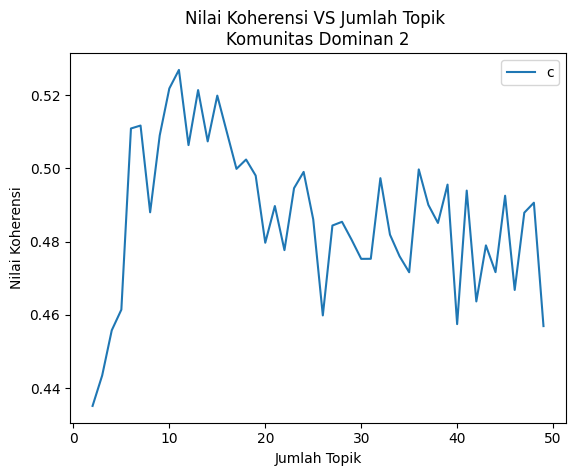

In [ ]:
# Menunjukkan Grafik
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.title("Nilai Koherensi VS Jumlah Topik \nKomunitas Dominan 2")
plt.xlabel("Jumlah Topik")
plt.ylabel("Nilai Koherensi")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Mencetak Nilai Koherensi
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " memiliki nilai Koherensi", round(cv, 4))

Num Topics = 2  memiliki nilai Koherensi 0.4351
Num Topics = 3  memiliki nilai Koherensi 0.4434
Num Topics = 4  memiliki nilai Koherensi 0.4558
Num Topics = 5  memiliki nilai Koherensi 0.4614
Num Topics = 6  memiliki nilai Koherensi 0.5109
Num Topics = 7  memiliki nilai Koherensi 0.5117
Num Topics = 8  memiliki nilai Koherensi 0.488
Num Topics = 9  memiliki nilai Koherensi 0.509
Num Topics = 10  memiliki nilai Koherensi 0.5218
Num Topics = 11  memiliki nilai Koherensi 0.5269
Num Topics = 12  memiliki nilai Koherensi 0.5064
Num Topics = 13  memiliki nilai Koherensi 0.5214
Num Topics = 14  memiliki nilai Koherensi 0.5074
Num Topics = 15  memiliki nilai Koherensi 0.5199
Num Topics = 16  memiliki nilai Koherensi 0.5099
Num Topics = 17  memiliki nilai Koherensi 0.4999
Num Topics = 18  memiliki nilai Koherensi 0.5024
Num Topics = 19  memiliki nilai Koherensi 0.4981
Num Topics = 20  memiliki nilai Koherensi 0.4797
Num Topics = 21  memiliki nilai Koherensi 0.4897
Num Topics = 22  memiliki nila

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Menghitung model dengan nilai koherensi tertinggi
max_coherence_index = coherence_values.index(max(coherence_values))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Memilih model dengan koherensi terbaik
optimal_model = model_list[max_coherence_index]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.015*"israel" + 0.009*"pakai" + 0.007*"palestina" + 0.006*"negara" + 0.006*"obat" + 0.006*"adil" + 0.006*"gas" + 0.006*"kalah" + 0.006*"kamu" + 0.006*"maksud"'),
 (1,
  '0.012*"palestina" + 0.010*"gaza" + 0.009*"indonesia" + 0.009*"akibat" + 0.009*"orang" + 0.007*"israel" + 0.006*"salah" + 0.006*"tunggu" + 0.006*"rakyat" + 0.006*"bohong"'),
 (2,
  '0.011*"prabowo" + 0.006*"kaya" + 0.006*"calon presiden" + 0.006*"israel" + 0.006*"bagaimana" + 0.006*"ketua" + 0.005*"rakyat" + 0.005*"etika" + 0.005*"turun" + 0.005*"ndasmu"'),
 (3,
  '0.016*"diem" + 0.010*"orang" + 0.008*"pimpin" + 0.006*"rakyat" + 0.006*"saksi" + 0.006*"syukurin" + 0.005*"hasil" + 0.005*"aku" + 0.005*"prabowo" + 0.005*"cinta"'),
 (4,
  '0.009*"rakyat" + 0.007*"makan" + 0.007*"bagaimana" + 0.007*"israel" + 0.006*"hamas" + 0.006*"sampai" + 0.006*"dukung" + 0.006*"negara" + 0.005*"satu" + 0.005*"kaya"'),
 (5,
  '0.011*"palestina" + 0.010*"sudah" + 0.008*"beliau" + 0.007*"israel" + 0.007*"salah" + 0.006*"murah" + 0.0

In [ ]:
# Jika ingin mengetahui jumlah topik optimal
optimal_num_topics = start + max_coherence_index * step
print("Jumlah topik optimal berdasarkan koherensi adalah:", optimal_num_topics)

Jumlah topik optimal berdasarkan koherensi adalah: 11


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Memvisualisasikan topik-topiknya
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix1, dictionary1)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.006561  0.063732       1        1  13.391010
5      0.186407 -0.073251       2        1  11.925418
1      0.010893  0.170884       3        1  11.269942
4     -0.013262  0.014678       4        1   8.956520
0     -0.032775 -0.057436       5        1   8.923549
6      0.025658  0.038858       6        1   8.715823
2     -0.107604 -0.064027       7        1   8.664366
3      0.003574 -0.008011       8        1   8.101816
10     0.036846 -0.023126       9        1   7.570782
7     -0.044982 -0.008164      10        1   6.621180
9     -0.058192 -0.054137      11        1   5.859594, topic_info=          Term       Freq      Total Category  logprob  loglift
255      kalah  15.000000  15.000000  Default   30.000  30.0000
305     ganjar  14.000000  14.000000  Default   29.000  29.0000
19       pilih  16.000000  16.000000  Default   28.000  28.0000
342       diem  10.000000  10.000000  Default   27.000  27.0000
1406      pagi   5.000000   5.000000  Default   26.000  26.0000
...        ...        ...        ...      ...      ...      ...
674      sehat   1.290460   6.188964  Topic11   -5.486   1.2693
320     negara   1.290459  11.602059  Topic11   -5.486   0.6409
296     kritik   1.290459   5.434608  Topic11   -5.486   1.3993
1360       lho   1.290458   5.334009  Topic11   -5.486   1.4180
570   presiden   1.290457  11.991378  Topic11   -5.486   0.6079

[737 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
685      10  0.510801    aamiin
2280      6  0.724253  aborigin
994       2  0.135256     acara
994       6  0.135256     acara
994       8  0.135256     acara
...     ...       ...       ...
43        8  0.237754    zionis
439       3  0.289908   zionist
439       4  0.289908   zionist
439      10  0.289908   zionist
954       7  0.724886    zulhas

[1376 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 2, 5, 1, 7, 3, 4, 11, 8, 10])

# <center><font color="pink">**Komunitas dominan 3 (Cluster-2)**</font></center>
Melihat topik-topik terdeteksi dari kata-kata yang paling sering muncul.

## <center><font color="pink">Ambil semua tweet dari komunitas dominan 3 (Cluster-2)</font></center>

In [ ]:
# Membentuk data frame yang berisi Id, indegree dan outdegree dari cluster 2
cluster_2 = df_leiden[df_leiden['Cluster'] == 2][['Id', 'indegree', 'outdegree']]

# Menampilkan jumlah user dan nama-namanya yang ada pada cluster 2

# Menyimpan jumlah user cluster 2 ke dalam variabel jumlah_id_cluster_2
jumlah_id_cluster_2 = len(cluster_2['Id'].unique())
# Melihat jumlah user cluster 2
print(f"Jumlah user pada Cluster 2 ada sebanyak {jumlah_id_cluster_2} user.")

# Menyimpan nama-nama user cluster 2 ke dalam variabel cluster_2_id
cluster_2_id = cluster_2['Id'].to_numpy()
# Mencetak tulisan untuk judul
print('\nBerikut adalah nama user-usernya:')
# Melihat nama-nama user cluster 2
print(cluster_2_id)

Jumlah user pada Cluster 2 ada sebanyak 33 user.

Berikut adalah nama user-usernya:
['bnsphrxyz' 'LoudMinorities' 'antikadrunbang' 'DeHoutman_id'
 'alfatih212426' 'SammiSoh' 'AyaniMel' 'Kappa_2023' 'asasfuro' 'JinNonik'
 'JokoPintar2' 'aesculapiusw' 'incognito_grey' 'Amox1L1N' '__anomali__'
 'Wisnuhid' 'ridho45916919' 'ajegilelu1' 'AsbabulKop51425' 'MarioInferno'
 'JLion555' 'HabanglaliK' 'Froyo64' 'Apokrifa23' 'Balistta'
 'AnakBawang_0705' 'MinminCha94972' 'fmn99_gaming' 'johnhomebapa'
 'ScioCogitoCredo' 'imamDouma' 'eeh_ito' 'anarchyhumanist']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Mengambil data dari variabel full_text pada df_baru yang ada username dari variabel cluster_2_id
df_cluster_2 = df_baru[df_baru['username'].isin(cluster_2_id)]

# Mengambil bagian full_text nya saja
df_tweet_cluster_2 = df_cluster_2['full_text']

df_tweet_cluster_2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_text
143,Yup Yg lebih tragic n lebih hina itu kita diam...
470,Ini pengecutnya teroris Hamas. Saat mereka mem...
919,@zoelfick Seharusnya pejuang Hamas cari medan ...
1239,@PribadiBales @LonenyDragon @Amran_bin_Ali @Wa...
1264,Tukang hoax @bnsphrxyz yg mnghina hukum Taurat...


## <center><font color="pink">Text Preprocessing</font></center>
Tahap pertama di Text Mining

In [ ]:
# Case Folding
df_tweet_cluster_2 = df_tweet_cluster_2.str.lower()
# Melihat sedikit bagian atas data
df_tweet_cluster_2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_text
143,yup yg lebih tragic n lebih hina itu kita diam...
470,ini pengecutnya teroris hamas. saat mereka mem...
919,@zoelfick seharusnya pejuang hamas cari medan ...
1239,@pribadibales @lonenydragon @amran_bin_ali @wa...
1264,tukang hoax @bnsphrxyz yg mnghina hukum taurat...


In [ ]:
# Menjalankan fungsi clean_tweet pada data df_cleaned2
df_cleaned2 = df_tweet_cluster_2.apply(clean_tweet)
# Melihat sedikit bagian atas data
df_cleaned2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_text
143,yup yg lebih tragic lebih hina itu kita diam ...
470,ini pengecutnya teroris hamas saat mereka memb...
919,seharusnya pejuang hamas cari medan perang kur...
1239,
1264,tukang hoax yg mnghina hukum taurat ini berusa...


In [ ]:
# Menjalankan fungsi word_tokenize_wrapper pada data df_cleaned2
df_tokens2 = df_cleaned2.apply(word_tokenize_wrapper)
# Melihat sedikit bagian atas data
df_tokens2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_text
143,"[yup, yg, lebih, tragic, lebih, hina, itu, kit..."
470,"[ini, pengecutnya, teroris, hamas, saat, merek..."
919,"[seharusnya, pejuang, hamas, cari, medan, pera..."
1239,[]
1264,"[tukang, hoax, yg, mnghina, hukum, taurat, ini..."


## <center><font color="pink">Feature Selection</font></center>
Tahap kedua di Text Mining

In [ ]:
# Menjalankan fungsi stopwords_removal pada data df_tokens2
df_tokens_sw2 = df_tokens2.apply(stopwords_removal)
# Melihat sedikit bagian atas data
df_tokens_sw2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_text
143,"[yup, tragic, hina, diam, membiarkan, kebiadab..."
470,"[pengecutnya, teroris, hamas, membordir, israe..."
919,"[pejuang, hamas, cari, medan, perang, kurusetr..."
1239,[]
1264,"[tukang, hoax, mnghina, hukum, taurat, berusah..."


In [ ]:
# Menjalankan fungsi replace_slang pada data df_tokens2
df_tokens_norm2 = df_tokens_sw2.apply(replace_slang)
# Melihat sedikit bagian atas data
df_tokens_norm2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_text
143,"[yup, tragic, hina, diam, membiarkan, kebiadab..."
470,"[pengecutnya, teroris, hamas, membordir, israe..."
919,"[pejuang, hamas, cari, medan, perang, kurusetr..."
1239,[]
1264,"[tukang, bohong, mnghina, hukum, taurat, berus..."


In [ ]:
# Membuat dictionary untuk menyimpan kata-kata yang telah di stemming
term_dict = {}
for document in df_tokens_norm2:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

# Mencetak jumlah istilah yang unik yang telah disimpan dalam term_dict
print(len(term_dict))

2284


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Memulai loop untuk mengganti nilai dari setiap istilah di term_dict dengan hasil stemming yang diperoleh dari fungsi stemmed_wrapper
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Menjalankan fungsi get_stemmed_term pada data df_tokens2
df_tokens_stemmed2 = df_tokens_norm2.apply(get_stemmed_term)
# Melihat sedikit bagian atas data
df_tokens_stemmed2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_text
143,"[yup, tragic, hina, diam, biar, biadab, kejam,..."
470,"[kecut, teroris, hamas, bordir, israel, pakai,..."
919,"[juang, hamas, cari, medan, perang, kurusetra,..."
1239,[]
1264,"[tukang, bohong, mnghina, hukum, taurat, usaha..."


## <center><font color="pink">Text Representation</font></center>
Tahap terakhir di Text Mining

In [ ]:
# Membuat kamus dari token yang telah di-stemmed
dictionary2 = corpora.Dictionary(df_tokens_stemmed2)
# Mengubah setiap dokumen dalam df_tokens_stemmed2 menjadi representasi matriks istilah-dokumen
doc_term_matrix2 = [dictionary2.doc2bow(doc) for doc in df_tokens_stemmed2]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## <center><font color="pink">LDA Model</font></center>

In [ ]:
# membuat objek untuk Model LDA menggunakan library gensim
LDA = gensim.models.ldamodel.LdaModel

# Membangun model LDA
lda_model = LDA(corpus=doc_term_matrix2, id2word=dictionary2, num_topics=10, random_state=100,
                chunksize=1000, passes=50, iterations=100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Mencetak topik-topik yang dihasilkan oleh model Latent Dirichlet Allocation (LDA) beserta kata-kata utama dan probabilitasnya dalam setiap topik
lda_model.print_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.024*"israel" + 0.020*"gaza" + 0.016*"palestina" + 0.013*"hamas" + 0.011*"pakai" + 0.007*"negara" + 0.007*"arab" + 0.007*"warga" + 0.007*"sejarah" + 0.007*"bela"'),
 (1,
  '0.059*"israel" + 0.040*"hamas" + 0.027*"gaza" + 0.020*"palestina" + 0.013*"warga" + 0.009*"dukung" + 0.009*"bantu" + 0.007*"arab" + 0.007*"sipil" + 0.007*"indonesia"'),
 (2,
  '0.042*"israel" + 0.013*"gaza" + 0.011*"senjata" + 0.007*"hamas" + 0.007*"bukti" + 0.007*"serang" + 0.007*"islam" + 0.007*"muslim" + 0.007*"manusia" + 0.007*"kutuk"'),
 (3,
  '0.028*"israel" + 0.016*"hamas" + 0.014*"gaza" + 0.012*"palestina" + 0.011*"yahudi" + 0.009*"dari" + 0.009*"warga" + 0.009*"iran" + 0.009*"anda" + 0.007*"seperti"'),
 (4,
  '0.039*"hamas" + 0.027*"tentara" + 0.016*"perang" + 0.015*"israel" + 0.013*"warga" + 0.012*"wanita" + 0.009*"pbb" + 0.009*"arab" + 0.008*"sandera" + 0.008*"manusia"'),
 (5,
  '0.027*"israel" + 0.020*"hamas" + 0.013*"palestina" + 0.011*"dukung" + 0.009*"raka" + 0.008*"gaza" + 0.007*"bodoh" + 0.

In [ ]:
# Memvisualisasikan topik-topiknya
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix2, dictionary2)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.027998 -0.079094       1        1  18.565654
6     -0.107674 -0.047216       2        1  17.535434
8     -0.034429  0.004325       3        1  11.045335
9     -0.088409  0.036250       4        1   9.372033
3      0.047482 -0.067976       5        1   8.143974
7     -0.025684  0.154920       6        1   7.868063
5      0.015768 -0.016843       7        1   7.405074
0      0.019380 -0.046327       8        1   7.348863
4      0.128094 -0.002328       9        1   6.848625
2      0.073471  0.064290      10        1   5.866946, topic_info=          Term        Freq       Total Category  logprob  loglift
269    tentara   18.000000   18.000000  Default  30.0000  30.0000
11       hamas  128.000000  128.000000  Default  29.0000  29.0000
100  palestina  115.000000  115.000000  Default  28.0000  28.0000
18     teroris   23.000000   23.000000  Default  27.0000  27.0000
264      pesek    7.000000    7.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
54      zionis    1.478256   33.090258  Topic10  -5.3208  -0.2725
100  palestina    1.361554  115.353897  Topic10  -5.4031  -1.6035
131  indonesia    1.337315   17.192541  Topic10  -5.4210   0.2820
156     yahudi    1.337306   27.472936  Topic10  -5.4210  -0.1867
34       sipil    1.337278   19.999147  Topic10  -5.4211   0.1308

[660 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
291       3  0.908733      abad
1243      3  0.679432      abis
1126      3  0.351946       abu
1126      6  0.351946       abu
1523      5  0.704413  acapkali
...     ...       ...       ...
238       3  0.191715   zionist
238       4  0.383429   zionist
238       6  0.191715   zionist
251       2  0.576841  zionista
251       4  0.288421  zionista

[1154 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 9, 10, 4, 8, 6, 1, 5, 3])

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix2, total_docs=10000)) # ukuran seberapa baik modelnya (semakin rendah semakin baik)

# Menghitung Nilai Koherensi
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=df_tokens_stemmed2, dictionary=dictionary2, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -6.408703370712768

Coherence Score:  0.32959336971909453


## <center><font color="pink">Optimal Number of Topics</font></center>

In [ ]:
# Membuat fungsi untuk menghitung nilai koherensi
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3, passes=50, iterations=100):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix2, id2word=dictionary2, num_topics=num_topics, passes=passes,
                                       iterations=iterations, random_state=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary2, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# menghitung nilai koherensi untuk berbagai model LDA dengan jumlah topik yang berbeda
model_list, coherence_values = compute_coherence_values(dictionary=dictionary2, corpus=doc_term_matrix2, texts=df_tokens_stemmed2, start=2, limit=50, step=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


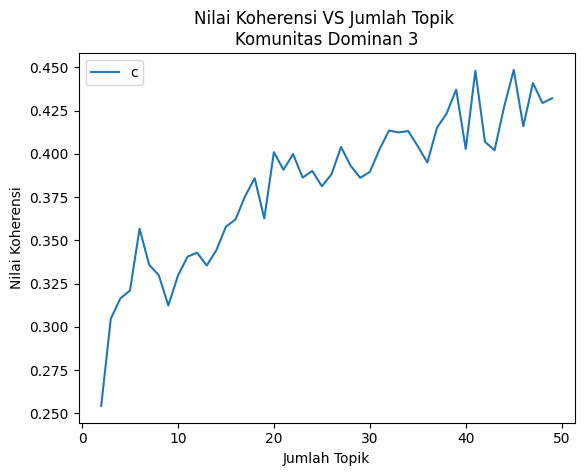

In [ ]:
# Menunjukkan Grafik
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.title("Nilai Koherensi VS Jumlah Topik \nKomunitas Dominan 3")
plt.xlabel("Jumlah Topik")
plt.ylabel("Nilai Koherensi")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Mencetak Nilai Koherensi
for m, cv in zip(x, coherence_values):
    print("Jumlah Topik =", m, " memiliki nilai Koherensi", round(cv, 4))

Jumlah Topik = 2  memiliki nilai Koherensi 0.2544
Jumlah Topik = 3  memiliki nilai Koherensi 0.3047
Jumlah Topik = 4  memiliki nilai Koherensi 0.3165
Jumlah Topik = 5  memiliki nilai Koherensi 0.321
Jumlah Topik = 6  memiliki nilai Koherensi 0.3567
Jumlah Topik = 7  memiliki nilai Koherensi 0.3359
Jumlah Topik = 8  memiliki nilai Koherensi 0.3299
Jumlah Topik = 9  memiliki nilai Koherensi 0.3124
Jumlah Topik = 10  memiliki nilai Koherensi 0.3296
Jumlah Topik = 11  memiliki nilai Koherensi 0.3406
Jumlah Topik = 12  memiliki nilai Koherensi 0.3429
Jumlah Topik = 13  memiliki nilai Koherensi 0.3355
Jumlah Topik = 14  memiliki nilai Koherensi 0.3443
Jumlah Topik = 15  memiliki nilai Koherensi 0.3579
Jumlah Topik = 16  memiliki nilai Koherensi 0.3621
Jumlah Topik = 17  memiliki nilai Koherensi 0.3755
Jumlah Topik = 18  memiliki nilai Koherensi 0.3859
Jumlah Topik = 19  memiliki nilai Koherensi 0.3626
Jumlah Topik = 20  memiliki nilai Koherensi 0.401
Jumlah Topik = 21  memiliki nilai Koheren

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Menghitung model dengan nilai koherensi tertinggi
max_coherence_index = coherence_values.index(max(coherence_values))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Memilih model dengan koherensi terbaik
optimal_model = model_list[max_coherence_index]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(9,
  '0.034*"palestina" + 0.014*"israel" + 0.014*"musuh" + 0.014*"anda" + 0.014*"bukti" + 0.010*"milik" + 0.010*"hamas" + 0.010*"orang" + 0.010*"jiwa" + 0.010*"kaki"'),
 (43,
  '0.053*"israel" + 0.036*"palestina" + 0.021*"hamas" + 0.021*"bela" + 0.016*"zionis" + 0.016*"teroris" + 0.010*"tuduh" + 0.010*"bantu" + 0.010*"orang" + 0.010*"selundup"'),
 (32,
  '0.026*"allah" + 0.014*"israel" + 0.013*"musa" + 0.013*"orang" + 0.013*"sahhar" + 0.013*"purwarupa" + 0.013*"terang" + 0.013*"dari" + 0.013*"kana" + 0.013*"perintah"'),
 (13,
  '0.028*"israel" + 0.026*"negara" + 0.020*"palestina" + 0.020*"juga" + 0.013*"passport" + 0.013*"boikot" + 0.013*"baca" + 0.013*"terima" + 0.013*"palestine" + 0.013*"peduli"'),
 (5,
  '0.033*"swt" + 0.033*"palestina" + 0.026*"israel" + 0.025*"umat" + 0.025*"drone" + 0.016*"kemenag" + 0.016*"hamas" + 0.008*"seluruh" + 0.008*"kalah" + 0.008*"biar"'),
 (30,
  '0.023*"zionis" + 0.020*"manusia" + 0.020*"gaza" + 0.016*"islam" + 0.014*"israel" + 0.013*"dari" + 0.013*"

In [ ]:
# Jika ingin mengetahui jumlah topik optimal
optimal_num_topics = start + max_coherence_index * step
print("Jumlah topik optimal berdasarkan koherensi adalah:", optimal_num_topics)

Jumlah topik optimal berdasarkan koherensi adalah: 45


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Memvisualisasikan topik-topiknya
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix2, dictionary2)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
41     0.151022  0.024698       1        1  5.850841
36     0.111930 -0.044487       2        1  4.526460
38     0.120961 -0.044550       3        1  4.232168
17     0.104851  0.160468       4        1  4.135141
19     0.094455 -0.006373       5        1  4.093798
20     0.062246 -0.110728       6        1  3.704020
6      0.081371 -0.034751       7        1  3.246144
9      0.024369  0.070232       8        1  3.218493
1      0.006378  0.022934       9        1  3.194651
34     0.066039 -0.054752      10        1  3.169213
44     0.079598 -0.007710      11        1  3.156856
33     0.094543  0.007996      12        1  3.105853
15     0.066507  0.069248      13        1  3.008979
43     0.074868  0.039107      14        1  2.863728
23     0.054953 -0.059377      15        1  2.851736
10     0.055021 -0.047237      16        1  2.564867
26     0.094212  0.034402      17        1  2.533725
24    -0.083290  0.093458      18        1  2.390680
18     0.012773  0.043625      19        1  2.250198
30    -0.052027 -0.026728      20        1  2.178526
13    -0.012592  0.056713      21        1  2.161420
8      0.039334  0.010057      22        1  2.018240
31    -0.051739 -0.134934      23        1  1.928524
37    -0.056775  0.034244      24        1  1.897074
3      0.013785 -0.077238      25        1  1.783889
16     0.012945  0.072262      26        1  1.735467
12    -0.019426  0.051493      27        1  1.722377
4     -0.027012 -0.077860      28        1  1.666576
25    -0.042450 -0.027467      29        1  1.611438
5     -0.038983  0.041115      30        1  1.602923
35    -0.053949 -0.131291      31        1  1.551745
22    -0.062391  0.064382      32        1  1.453306
28    -0.011596 -0.005416      33        1  1.412755
27    -0.032824 -0.047584      34        1  1.372986
42    -0.032480  0.010052      35        1  1.334815
29    -0.034756 -0.001823      36        1  1.330884
0     -0.052673 -0.026325      37        1  1.253744
11    -0.080113  0.031563      38        1  1.139291
39    -0.064178 -0.037279      39        1  1.117125
32    -0.095596 -0.005852      40        1  0.783013
7     -0.120056  0.049859      41        1  0.727077
40    -0.093124  0.047530      42        1  0.670094
14    -0.094456 -0.015042      43        1  0.518917
2     -0.080751 -0.024870      44        1  0.495420
21    -0.128922  0.014234      45        1  0.434826, topic_info=          Term       Freq       Total Category  logprob  loglift
11       hamas  129.00000  129.000000  Default  30.0000  30.0000
54      zionis   34.00000   34.000000  Default  29.0000  29.0000
100  palestina  113.00000  113.000000  Default  28.0000  28.0000
156     yahudi   28.00000   28.000000  Default  27.0000  27.0000
4       israel  176.00000  176.000000  Default  26.0000  26.0000
..         ...        ...         ...      ...      ...      ...
12       ingat    0.00866    2.963160  Topic45  -7.8586  -0.3974
13       kecut    0.00866    7.764560  Topic45  -7.8586  -1.3607
14     lindung    0.00866    7.655413  Topic45  -7.8586  -1.3465
15       pakai    0.00866   18.671419  Topic45  -7.8586  -2.2381
16       rudal    0.00866    6.545938  Topic45  -7.8586  -1.1900

[2282 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1003     30  0.732300    ababil
291      17  0.463859      abad
291      22  0.463859      abad
524       4  0.660407      abat
1030     10  0.390538     abdul
...     ...       ...       ...
251      13  0.295843  zionista
251      19  0.147921  zionista
251      20  0.147921  zionista
251      26  0.147921  zionista
1192     14  0.685965     zombi

[3184 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[42, 37, 39, 18, 20, 21, 7, 10, 2, 35, 45, 34, 16, 44, 24, 11, 27, 25, 19, 31, 14, 9, 32, 38, 4, 17, 13, 5, 26, 6, 36, 23, 29, 2